## Manager Survey Analysis

In [3]:
# imports
import numpy as np
import os
import pandas as pd

### Importation des données

In [2]:
GENERAL_PATH = os.path.join("Datasets")
IN_OUT_TIME_PATH = os.path.join("Datasets", "in_out_time")

MANAGER_SURVEY_CSV = "manager_survey_data.csv"
GENERAL_CSV = "general_data.csv"
IN_TIME_CSV = "in_time.csv"
OUT_TIME_CSV = "out_time.csv"

def load_data(general_path, csv):
    csv_path = os.path.join(general_path, csv)
    df = pd.read_csv(csv_path, sep=",", header = 0)
    return df

NameError: name 'os' is not defined

In [25]:
manager_survey = load_data(GENERAL_PATH, MANAGER_SURVEY_CSV)
general = load_data(GENERAL_PATH, GENERAL_CSV)

### Check des données

In [1]:
manager_survey.head(10)

NameError: name 'manager_survey' is not defined

In [27]:
manager_survey.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [28]:
manager_survey.agg(['sum'])

,EmployeeID,JobInvolvement,PerformanceRating
sum,9726255,12039,13908


### Attrition

In [29]:
merged_esd = manager_survey.merge(general[['EmployeeID','Attrition']], how='left', on='EmployeeID', )
merged_esd

,EmployeeID,JobInvolvement,PerformanceRating,Attrition
0,1,3,3,No
1,2,2,4,Yes
2,3,3,3,No
3,4,2,3,No
4,5,3,3,No
...,...,...,...,...
4405,4406,3,3,No
4406,4407,2,3,No
4407,4408,3,4,No
4408,4409,2,3,No


### Analyse Job Involvement

#### Moyenne jobInvolvement

In [30]:
manager_survey['JobInvolvement'].agg(['sum']) / manager_survey['JobInvolvement'].count()

sum    2.729932
Name: JobInvolvement, dtype: float64

#### Quantité de notes identiques

In [31]:
manager_survey['JobInvolvement'].value_counts()

3    2604
2    1125
4     432
1     249
Name: JobInvolvement, dtype: int64

- 249 Employés ont été notés à 1
- 1125 Employés ont été notés à 2
- 2604 Employés ont été notés à 3
- 432 Employés ont été notés à 4

<AxesSubplot:ylabel='Frequency'>

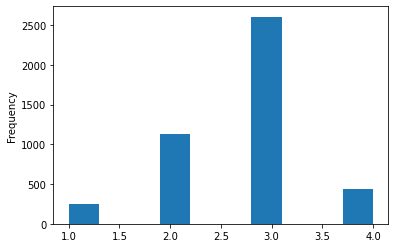

In [32]:
manager_survey["JobInvolvement"].plot.hist()

### Analyse Job Involvement

#### Moyenne PerformanceRating

In [33]:
manager_survey['PerformanceRating'].agg(['sum']) / manager_survey['PerformanceRating'].count()

sum    3.153741
Name: PerformanceRating, dtype: float64

#### Quantité de notes identiques

In [34]:
manager_survey['PerformanceRating'].value_counts()

3    3732
4     678
Name: PerformanceRating, dtype: int64

- Aucun employés n'a été noté à 1
- Aucun employés n'a été noté à 2
- 3732 Employés ont été notés à 3
- 678 Employés ont été notés à 4

<AxesSubplot:ylabel='Frequency'>

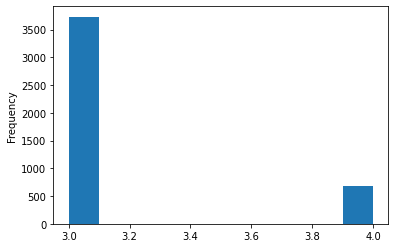

In [35]:
manager_survey["PerformanceRating"].plot.hist()

### Analyse générale

On garde les employés ayant un JobInvolvement inférieur à 3 (C'est à dire faible ou moyen)

In [36]:

ms_df = merged_esd.where(manager_survey["JobInvolvement"] < 3) # replace where false

index_with_nan = ms_df.index[ms_df.isnull().any(axis=1)]

ms_df = ms_df.drop(['PerformanceRating'], axis=1)
ms_df.drop(index_with_nan, inplace=True)
ms_df


,EmployeeID,JobInvolvement,Attrition
1,2.0,2.0,Yes
3,4.0,2.0,No
10,11.0,2.0,No
13,14.0,2.0,Yes
16,17.0,2.0,No
...,...,...,...
4399,4400.0,2.0,No
4401,4402.0,2.0,No
4404,4405.0,2.0,No
4406,4407.0,2.0,No


Sur ces employés, seulement 234 sont parti de l'entreprise

In [37]:
ms_df.where(ms_df["Attrition"] == "Yes").count()

EmployeeID        234
JobInvolvement    234
Attrition         234
dtype: int64

Sur un total de 711 employés qui ont démissionés

In [38]:
merged_esd.where(merged_esd["Attrition"] == "Yes").count()

EmployeeID           711
JobInvolvement       711
PerformanceRating    711
Attrition            711
dtype: int64

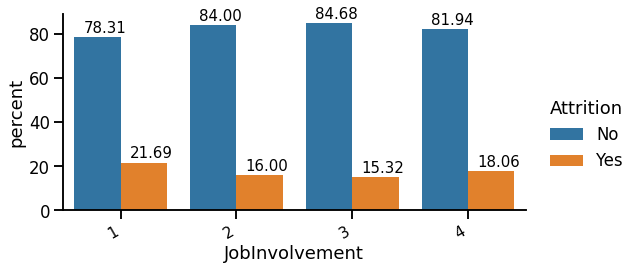

In [42]:
from itertools import product
import seaborn as sns

y = 'Attrition'

def add_annotation(cat, c):
    x1 = c.get_x() + c.get_width() / 2 - .12
    y1 = c.get_y() + c.get_height() + 2

    cat.ax.annotate(format(c.get_height(), ".2f"), (x1, y1), size=15)

def plot_hist(name, data, annot=True):

    x = name

    temp_data = (data
                 .groupby(x)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index())
    sns.set_context('talk', font_scale = 1)
    catp = sns.catplot(data=temp_data, x=name, y='percent', hue='Attrition', kind='bar', height = 4, aspect = 2, legend_out=True, margin_titles=True)
    catp.set_xticklabels(rotation=30, fontsize=15, horizontalalignment='right',)

    if annot:
        spots = catp.ax.patches
        # need to separate in half de spots to put them in the right order (first half: Attrition=no; second half Attrition=yes)
        mid = len(spots) // 2

        for i in range(0, mid) :

            add_annotation(catp, spots[i])
            add_annotation(catp, spots[mid + i])

hue_order = ['No', 'Yes']

plot_hist('JobInvolvement', merged_esd)